# USA House Price Prediction
![](us1.jpg)

### Contents 
1. Exploratory Data Analysis
    - Distribution of data plotting using distplot
    - Feature distribution using Boxplot
    - Data Pre-processing
2. Build Regression Models
    - Linear regression
    - Random Forest regression
    - Lasso regression+
    - Ridge regression
    - Gradient Boosting regression
    - XGBoosting regression
    - MLP regression
    - Support vector regressor
3. Compare Linear and Polynomial Features 






### 3   Importing Libraries and dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)

### 4   Data loading and overview

In [2]:
df = pd.read_csv('../DataSets/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## 5   EDA : Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Let's visualize the dataset...

### 5.A   Visualization using Distplot on the various attributes
distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

We look at the distribution

**Average Area Income**

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

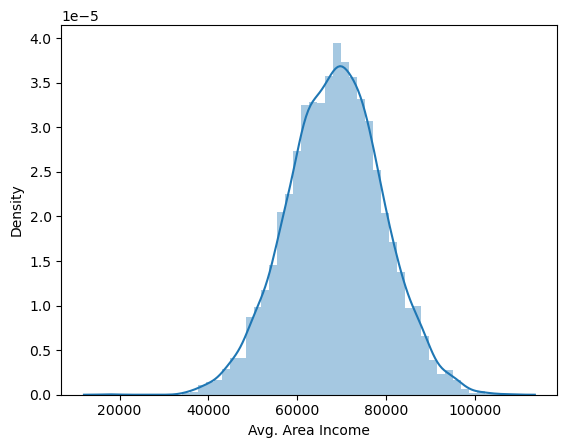

In [4]:
sns.distplot(df['Avg. Area Income'])

**Average Area House Age**

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Density'>

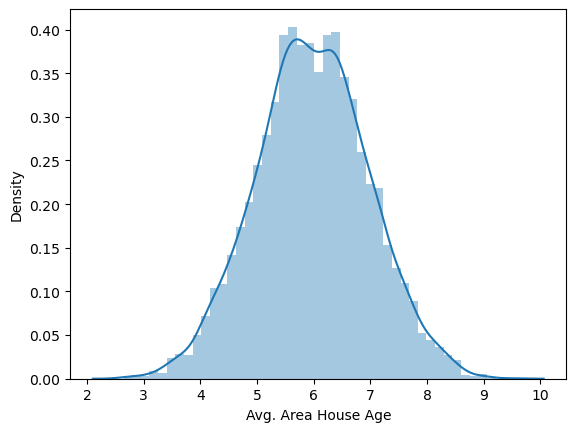

In [5]:
sns.distplot(df['Avg. Area House Age'])

**Average Area Number of rooms**

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Density'>

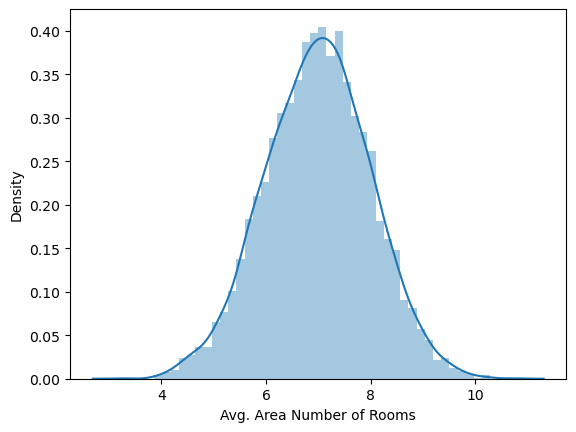

In [6]:
sns.distplot(df['Avg. Area Number of Rooms'])

**Average Area Number of bedrooms**

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Density'>

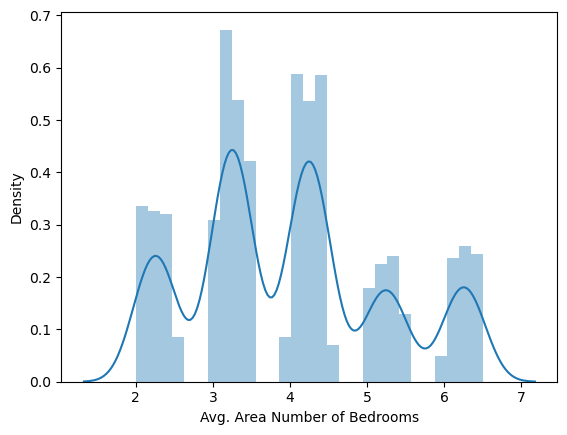

In [7]:
sns.distplot(df['Avg. Area Number of Bedrooms'])

**Area Population**

<AxesSubplot:xlabel='Area Population', ylabel='Density'>

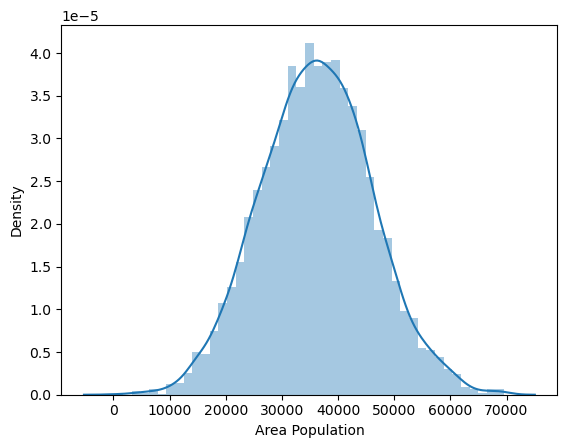

In [8]:
sns.distplot(df['Area Population'])

**Price**

<AxesSubplot:xlabel='Price', ylabel='Density'>

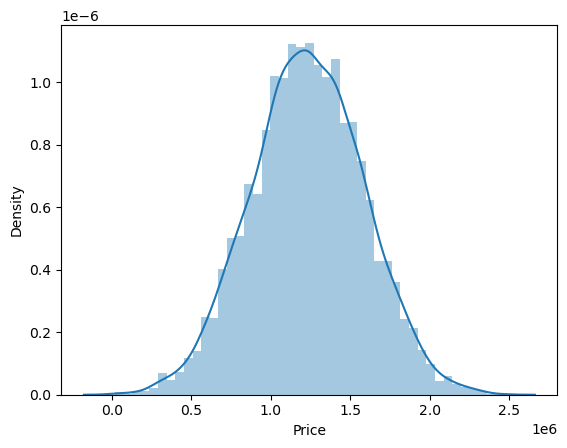

In [9]:
sns.distplot(df['Price'])

Feature distribution is normal

### 5.B   Visualization using Boxplot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

**Average Area Income**

<AxesSubplot:xlabel='Avg. Area Income'>

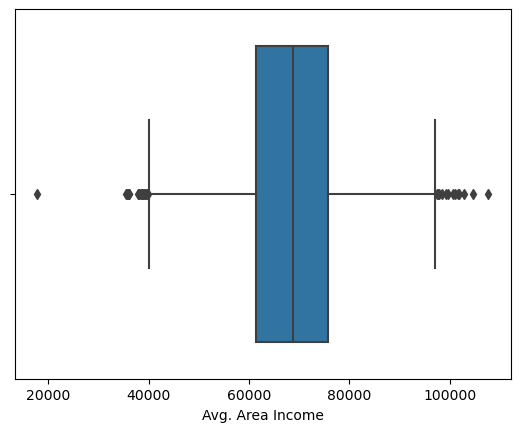

In [10]:
sns.boxplot(x='Avg. Area Income', data = df)

**Average Area House Age**

<AxesSubplot:xlabel='Avg. Area House Age'>

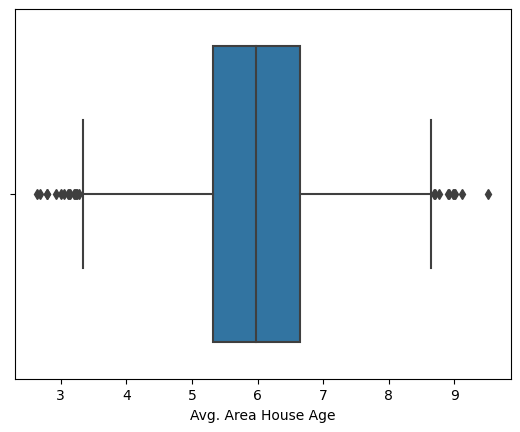

In [11]:
sns.boxplot(x='Avg. Area House Age', data = df)

**Average Area Number of rooms**

<AxesSubplot:xlabel='Avg. Area Number of Rooms'>

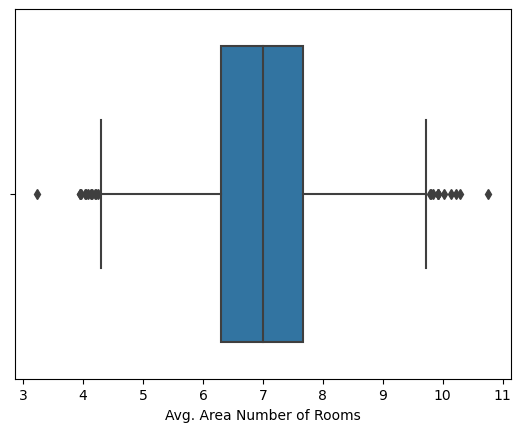

In [12]:
sns.boxplot(x='Avg. Area Number of Rooms', data = df)

**Average Area Number of bedrooms**

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms'>

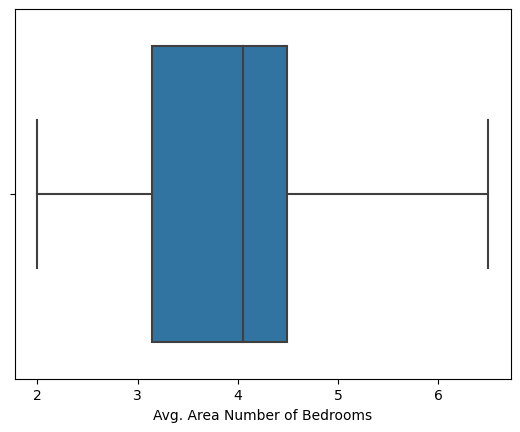

In [13]:
sns.boxplot(x='Avg. Area Number of Bedrooms', data = df)

**Area Population**

<AxesSubplot:xlabel='Area Population'>

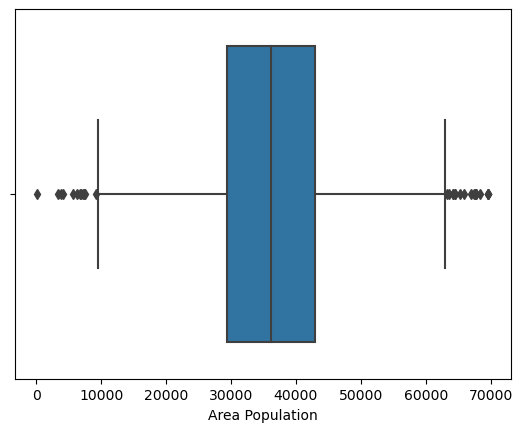

In [14]:
sns.boxplot(x='Area Population', data = df)

**Price**

<AxesSubplot:xlabel='Price'>

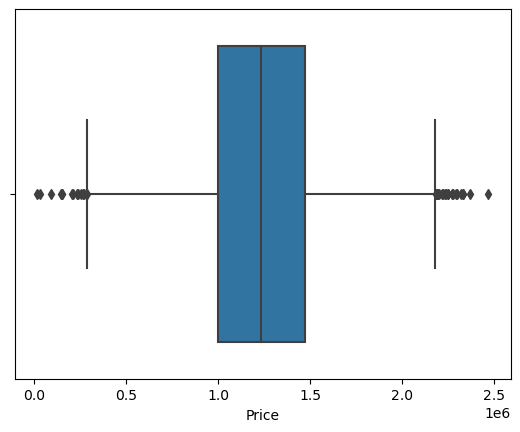

In [15]:
sns.boxplot(x='Price', data = df)

We have outliers

### 5.C   Data Preprocessing
Data preprocessing is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values, impossible data combinations, and missing values, etc. 

In [16]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [17]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [18]:
df = df.drop('Address', axis = 1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


<AxesSubplot:>

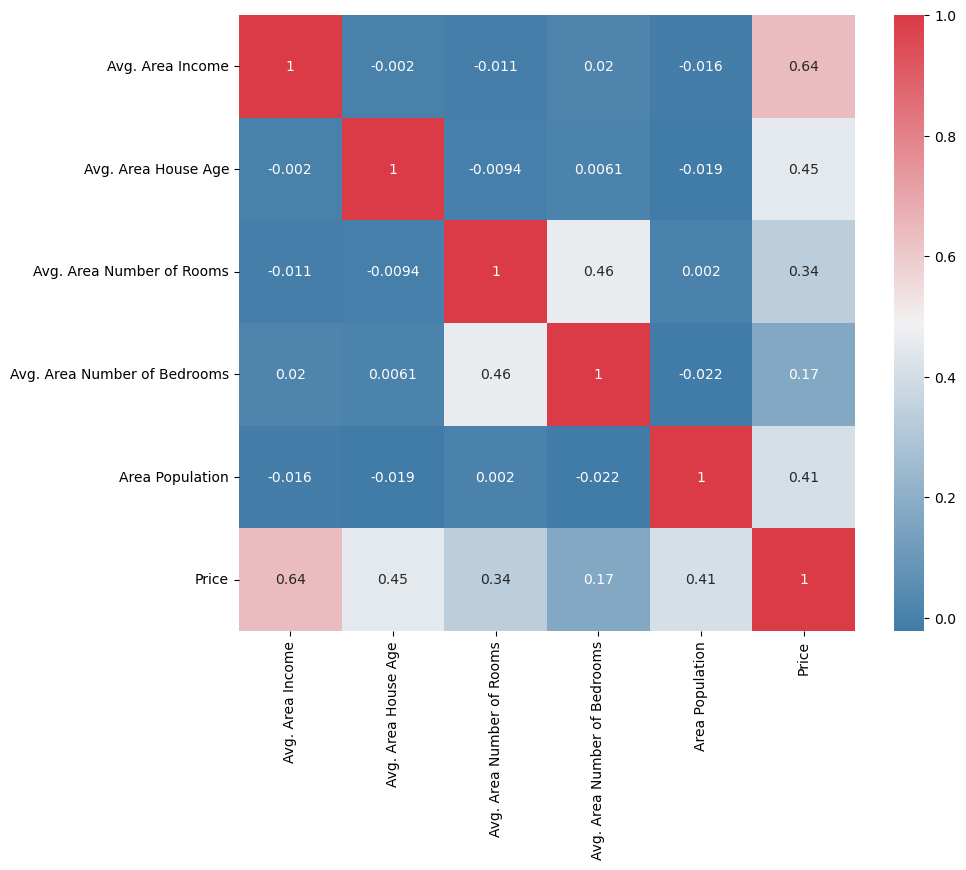

In [19]:
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),
           cmap = sns.diverging_palette(240, 10, as_cmap = True), 
           square = True, ax = ax)

In [20]:
df.corr()['Price'].sort_values()

Avg. Area Number of Bedrooms    0.171071
Avg. Area Number of Rooms       0.335664
Area Population                 0.408556
Avg. Area House Age             0.452543
Avg. Area Income                0.639734
Price                           1.000000
Name: Price, dtype: float64

In [21]:
std = StandardScaler()
df_std = std.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

In [22]:
df_std.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518


## 6   Build Regression Models

In [23]:
X = df.drop('Price', axis = 1)
y = df.Price

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [25]:
regressor = sm.OLS(y_train, X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.150e+04
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                        0.00
Time:                        10:26:30   Log-Likelihood:                         -55265.
No. Observations:                4000   AIC:                                  1.105e+05
Df Residuals:                    3995   BIC:                                  1.106e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

**The function removes features with high p-value**

In [26]:
while True:
    if max(regressor.pvalues) > 0.05:
        drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
        print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
        X_train_dropped = X_train_dropped.drop(columns = [drop_variable.index[0]])
        regressor = sm.OLS(y_train, X_train_dropped).fit()
    else:
        print("All p values less than 0.05")
        break


Dropping Avg. Area Number of Bedrooms and running regression again because pvalue is: 0.12293348245949313
All p values less than 0.05


**Summary report for the model fitting and creation**

In [27]:
print(regressor.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.687e+04
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                        0.00
Time:                        10:26:30   Log-Likelihood:                         -55266.
No. Observations:                4000   AIC:                                  1.105e+05
Df Residuals:                    3996   BIC:                                  1.106e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### SelectKBest
SelectKBest then simply retains the first k features of X with the highest scores. So, for example, if you pass chi2 as a score function, SelectKBest will compute the chi2 statistic between each feature of X and y (assumed to be class labels). A small value will mean the feature is independent of y.

<AxesSubplot:>

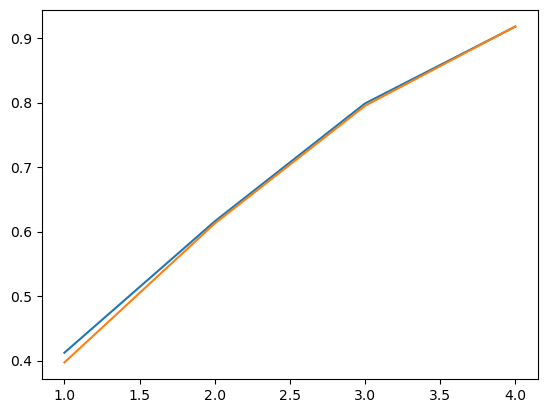

In [28]:
column_names = df.drop(columns = ['Price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

#Look at shape
for k in range(1, 5):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [29]:
# k = 4 because look at orange line
selector = SelectKBest(f_regression, k = 4)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'],
      dtype='object')

In [30]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

###  7.     Model performance evaluation using the Accuracy Scores

In [31]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor(), XGBRegressor(), GradientBoostingRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": round(score, 2)}, ignore_index=True)

model_performance.sort_values(by = 'Score', ascending = False)

,Features,Model,Score
0,Linear,LinearRegression(),0.92
1,Linear,Ridge(),0.92
2,Linear,Lasso(),0.92
7,Linear,([DecisionTreeRegressor(criterion='friedman_ms...,0.90
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.89
6,Linear,"XGBRegressor(base_score=None, booster=None, ca...",0.88
5,Linear,MLPRegressor(),0.49
3,Linear,SVR(),-0.00


**Deploying the polynomial features as well**

(4000, 21)


<AxesSubplot:>

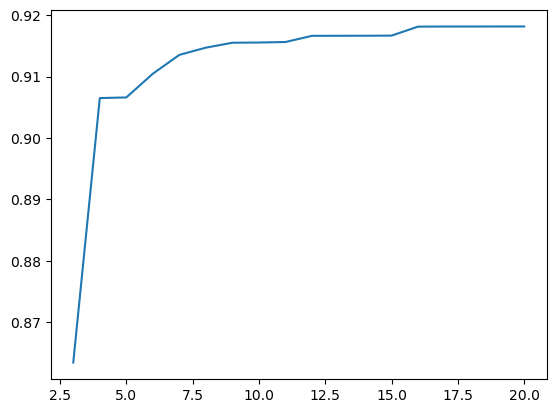

In [32]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(3, 21):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared.append(regressor.score(X_train_transformed, y_train))
    
sns.lineplot(x = no_of_features, y = r_squared)

In [33]:
selector = SelectKBest(f_regression, k = 16)
X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

### Compare Linear and Polynomial Features 



In [34]:
models = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor(), XGBRegressor(), GradientBoostingRegressor()]

for model in models:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": round(score, 2)}, ignore_index=True)

model_performance.sort_values(by = 'Score', ascending = False)


,Features,Model,Score
0,Linear,LinearRegression(),0.92
1,Linear,Ridge(),0.92
2,Linear,Lasso(),0.92
8,Polynomial,LinearRegression(),0.92
9,Polynomial,Ridge(),0.92
10,Polynomial,Lasso(),0.92
15,Polynomial,([DecisionTreeRegressor(criterion='friedman_ms...,0.91
7,Linear,([DecisionTreeRegressor(criterion='friedman_ms...,0.90
12,Polynomial,"(DecisionTreeRegressor(max_features='auto', ra...",0.90
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.89


*******************